## Step 1: Install Required Dependencies

In [ ]:
!pip install roboflow requests pillow

## Step 2: Import Libraries

In [ ]:
import os
import shutil
from pathlib import Path
from roboflow import Roboflow

## Step 3: Configure API Key and Output Directory

**To get your API key:**
1. Create a free account at https://roboflow.com
2. Go to https://app.roboflow.com/settings/api
3. Copy your private API key

In [ ]:
# Replace with your Roboflow API key
API_KEY = "bM4qRKfwBcc7ObIs9MO6"  # Replace with your actual API key

# Output directory for the dataset
OUTPUT_DIR = "dataset"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"API Key: {'*' * (len(API_KEY) - 4) + API_KEY[-4:]}")
print(f"Output Directory: {OUTPUT_DIR}")

## Step 4: Download Dataset from Roboflow

## Step 4: Download Dataset (Direct Download Method)

Using direct download URL from Roboflow

In [ ]:
import requests
import zipfile
from tqdm import tqdm

print("📥 Downloading dataset using authenticated download...")
print("This may take a few minutes depending on your internet speed.\n")

# Roboflow authenticated download URL
WORKSPACE = "trial-b8awm"
PROJECT = "id-cards-classification-phz4u"
VERSION = "1"

# Build download URL with API key
DOWNLOAD_URL = f"https://app.roboflow.com/{WORKSPACE}/{PROJECT}/{VERSION}/download/folder"

try:
    # Step 1: Download the zip file with authentication
    print("Step 1: Downloading zip file with authentication...")
    print(f"Project: {WORKSPACE}/{PROJECT}")
    print(f"Version: {VERSION}\n")
    
    # Add API key as query parameter
    params = {
        'api_key': API_KEY
    }
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }
    
    response = requests.get(DOWNLOAD_URL, params=params, headers=headers, stream=True)
    
    if response.status_code == 403:
        print("❌ 403 Forbidden Error")
        print("\nThis could mean:")
        print("1. Your API key doesn't have access to this dataset")
        print("2. The dataset is private")
        print("3. The API key is invalid or expired")
        print("\nTrying alternative method with Roboflow library...")
        
        # Fallback to Roboflow library method
        from roboflow import Roboflow
        
        rf = Roboflow(api_key=API_KEY)
        print("✓ Roboflow client initialized")
        
        project = rf.workspace(WORKSPACE).project(PROJECT)
        print(f"✓ Accessed project: {PROJECT}")
        
        version = project.version(VERSION)
        print(f"✓ Got version: {VERSION}")
        
        print(f"\nDownloading to: {os.path.abspath(OUTPUT_DIR)}")
        dataset = version.download("folder", location=OUTPUT_DIR)
        print("✓ Download complete using Roboflow library")
        
    else:
        response.raise_for_status()
        
        # Get file size
        total_size = int(response.headers.get('content-length', 0))
        
        # Save to temporary zip file
        zip_path = os.path.join(OUTPUT_DIR, "dataset.zip")
        
        with open(zip_path, 'wb') as f:
            if total_size == 0:
                f.write(response.content)
                print("✓ Downloaded (size unknown)")
            else:
                with tqdm(total=total_size, unit='B', unit_scale=True, desc="Downloading") as pbar:
                    for chunk in response.iter_content(chunk_size=8192):
                        if chunk:
                            f.write(chunk)
                            pbar.update(len(chunk))
        
        file_size = os.path.getsize(zip_path) / (1024 * 1024)
        print(f"✓ Downloaded: {file_size:.2f} MB")
        
        # Step 2: Extract the zip file
        print("\nStep 2: Extracting dataset...")
        
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            file_list = zip_ref.namelist()
            print(f"Found {len(file_list)} files in archive")
            
            for file in tqdm(file_list, desc="Extracting"):
                zip_ref.extract(file, OUTPUT_DIR)
        
        print("✓ Extraction complete")
        
        # Step 3: Clean up
        print("\nStep 3: Cleaning up...")
        os.remove(zip_path)
        print("✓ Removed temporary zip file")
    
    # Step 4: Verify download
    print("\n" + "="*60)
    print("📦 DOWNLOAD VERIFICATION")
    print("="*60)
    
    if os.path.exists(OUTPUT_DIR):
        print(f"✓ Directory exists: {os.path.abspath(OUTPUT_DIR)}")
        
        # List all items
        items = os.listdir(OUTPUT_DIR)
        print(f"✓ Items found: {len(items)}")
        
        if items:
            print("\nDirectory contents:")
            for item in items:
                item_path = os.path.join(OUTPUT_DIR, item)
                if os.path.isdir(item_path):
                    subfiles = []
                    for root, dirs, files in os.walk(item_path):
                        subfiles.extend(files)
                    print(f"  📁 {item}/ ({len(subfiles)} files)")
                else:
                    file_size = os.path.getsize(item_path) / (1024 * 1024)
                    print(f"  📄 {item} ({file_size:.2f} MB)")
            
            # Count total images
            total_images = 0
            for root, dirs, files in os.walk(OUTPUT_DIR):
                image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                total_images += len(image_files)
            
            print(f"\n✅ TOTAL IMAGES DOWNLOADED: {total_images}")
            
            if total_images > 0:
                print("\n🎉 Dataset downloaded successfully!")
            else:
                print("\n⚠️ WARNING: No image files found!")
        else:
            print("\n❌ ERROR: Directory is empty!")
    else:
        print(f"❌ ERROR: Directory not found")
        
except Exception as e:
    print(f"\n❌ Error: {e}")
    print("\nTroubleshooting:")
    print("1. Verify your API key is correct: https://app.roboflow.com/settings/api")
    print("2. Check if you have access to this dataset")
    print("3. Try logging into Roboflow and accessing the dataset in browser")
    print("4. Dataset URL: https://universe.roboflow.com/trial-b8awm/id-cards-classification-phz4u")
    import traceback
    print("\nFull error details:")
    traceback.print_exc()

## Step 4B: Extract Manually Downloaded Dataset

Using manually downloaded zip file from Roboflow

In [4]:
import zipfile
from tqdm import tqdm

# Path to manually downloaded zip file
ZIP_FILE_PATH = r"C:\Users\Lenovo\Downloads\ID cards Classification.v1i.folder.zip"

print("📦 Extracting manually downloaded dataset...")
print(f"Source: {ZIP_FILE_PATH}")
print(f"Destination: {os.path.abspath(OUTPUT_DIR)}\n")

try:
    # Check if zip file exists
    if not os.path.exists(ZIP_FILE_PATH):
        raise FileNotFoundError(f"Zip file not found at: {ZIP_FILE_PATH}")
    
    # Get file size
    file_size = os.path.getsize(ZIP_FILE_PATH) / (1024 * 1024)
    print(f"✓ Zip file found ({file_size:.2f} MB)")
    
    # Extract the zip file
    print("\nExtracting files...")
    with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
        # Get list of files
        file_list = zip_ref.namelist()
        print(f"Found {len(file_list)} files in archive")
        
        # Extract with progress bar
        for file in tqdm(file_list, desc="Extracting"):
            zip_ref.extract(file, OUTPUT_DIR)
    
    print("✓ Extraction complete!")
    
    # Verify extraction
    print("\n" + "="*60)
    print("📦 EXTRACTION VERIFICATION")
    print("="*60)
    
    if os.path.exists(OUTPUT_DIR):
        print(f"✓ Directory exists: {os.path.abspath(OUTPUT_DIR)}")
        
        # List all items
        items = os.listdir(OUTPUT_DIR)
        print(f"✓ Items found: {len(items)}")
        
        if items:
            print("\nDirectory contents:")
            for item in items:
                item_path = os.path.join(OUTPUT_DIR, item)
                if os.path.isdir(item_path):
                    # Count files in subdirectory
                    subfiles = []
                    for root, dirs, files in os.walk(item_path):
                        subfiles.extend(files)
                    print(f"  📁 {item}/ ({len(subfiles)} files)")
                else:
                    file_size = os.path.getsize(item_path) / (1024 * 1024)
                    print(f"  📄 {item} ({file_size:.2f} MB)")
            
            # Count total images
            total_images = 0
            image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')
            for root, dirs, files in os.walk(OUTPUT_DIR):
                image_files = [f for f in files if f.lower().endswith(image_extensions)]
                total_images += len(image_files)
            
            print(f"\n✅ TOTAL IMAGES EXTRACTED: {total_images}")
            
            if total_images > 0:
                print("\n🎉 Dataset extracted successfully!")
            else:
                print("\n⚠️ WARNING: No image files found!")
                print("Check the extracted folder structure")
        else:
            print("\n❌ ERROR: Directory is empty!")
    else:
        print(f"❌ ERROR: Directory not found")
        
except FileNotFoundError as e:
    print(f"\n❌ File Not Found: {e}")
    print("\nPlease check:")
    print("1. The file path is correct")
    print("2. The file hasn't been moved or deleted")
    print(f"3. Current path: {ZIP_FILE_PATH}")
    
except zipfile.BadZipFile as e:
    print(f"\n❌ Invalid Zip File: {e}")
    print("The file may be corrupted or not a valid zip archive")
    print("Try downloading it again")
    
except Exception as e:
    print(f"\n❌ Error: {e}")
    import traceback
    print("\nFull error details:")
    traceback.print_exc()

📦 Extracting manually downloaded dataset...
Source: C:\Users\Lenovo\Downloads\ID cards Classification.v1i.folder.zip
Destination: c:\Users\Lenovo\OneDrive - wilp.bits-pilani.ac.in\Documents\AIML\kyc-aml-document-classifier\dataset_generator\roboflow_dataset

✓ Zip file found (282.96 MB)

Extracting files...
Found 5598 files in archive


Extracting: 100%|██████████| 5598/5598 [00:07<00:00, 747.14it/s]


✓ Extraction complete!

📦 EXTRACTION VERIFICATION
✓ Directory exists: c:\Users\Lenovo\OneDrive - wilp.bits-pilani.ac.in\Documents\AIML\kyc-aml-document-classifier\dataset_generator\roboflow_dataset
✓ Items found: 5

Directory contents:
  📄 dataset.zip (0.01 MB)
  📄 README.dataset.txt (0.00 MB)
  📄 README.roboflow.txt (0.00 MB)
  📁 train/ (5386 files)
  📁 valid/ (200 files)

✅ TOTAL IMAGES EXTRACTED: 5586

🎉 Dataset extracted successfully!


## Step 5: Explore Dataset Structure

In [5]:
# List the dataset structure
print("📁 Dataset Structure:")
print("=" * 50)

for root, dirs, files in os.walk(OUTPUT_DIR):
    level = root.replace(OUTPUT_DIR, '').count(os.sep)
    indent = ' ' * 2 * level
    folder_name = os.path.basename(root)
    if folder_name:
        print(f'{indent}{folder_name}/')
    subindent = ' ' * 2 * (level + 1)
    
    # Count files by type
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        print(f'{subindent}({len(image_files)} images)')

📁 Dataset Structure:
roboflow_dataset/
  train/
    aadhar/
      (1324 images)
    driving/
      (1410 images)
    pan/
      (1194 images)
    voter/
      (1458 images)
  valid/
    aadhar/
      (35 images)
    driving/
      (37 images)
    pan/
      (90 images)
    voter/
      (38 images)


## Step 6: Count Images per Class

In [6]:
def count_images_in_dataset(base_dir):
    """Count images per class in train and valid sets"""
    stats = {}
    
    for split in ['train', 'valid', 'test']:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            continue
            
        stats[split] = {}
        
        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if os.path.isdir(class_dir):
                image_files = [f for f in os.listdir(class_dir) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                stats[split][class_name] = len(image_files)
    
    return stats

# Count images
dataset_stats = count_images_in_dataset(OUTPUT_DIR)

# Display statistics
print("\n📊 Dataset Statistics:")
print("=" * 50)

for split, classes in dataset_stats.items():
    print(f"\n{split.upper()} SET:")
    total = 0
    for class_name, count in sorted(classes.items()):
        print(f"  - {class_name}: {count} images")
        total += count
    print(f"  TOTAL: {total} images")

# Calculate grand total
grand_total = sum(sum(classes.values()) for classes in dataset_stats.values())
print(f"\n🎯 GRAND TOTAL: {grand_total} images")


📊 Dataset Statistics:

TRAIN SET:
  - aadhar: 1324 images
  - driving: 1410 images
  - pan: 1194 images
  - voter: 1458 images
  TOTAL: 5386 images

VALID SET:
  - aadhar: 35 images
  - driving: 37 images
  - pan: 90 images
  - voter: 38 images
  TOTAL: 200 images

🎯 GRAND TOTAL: 5586 images


## Step 7: Display Sample Images

🖼️  Sample Images from Training Set:


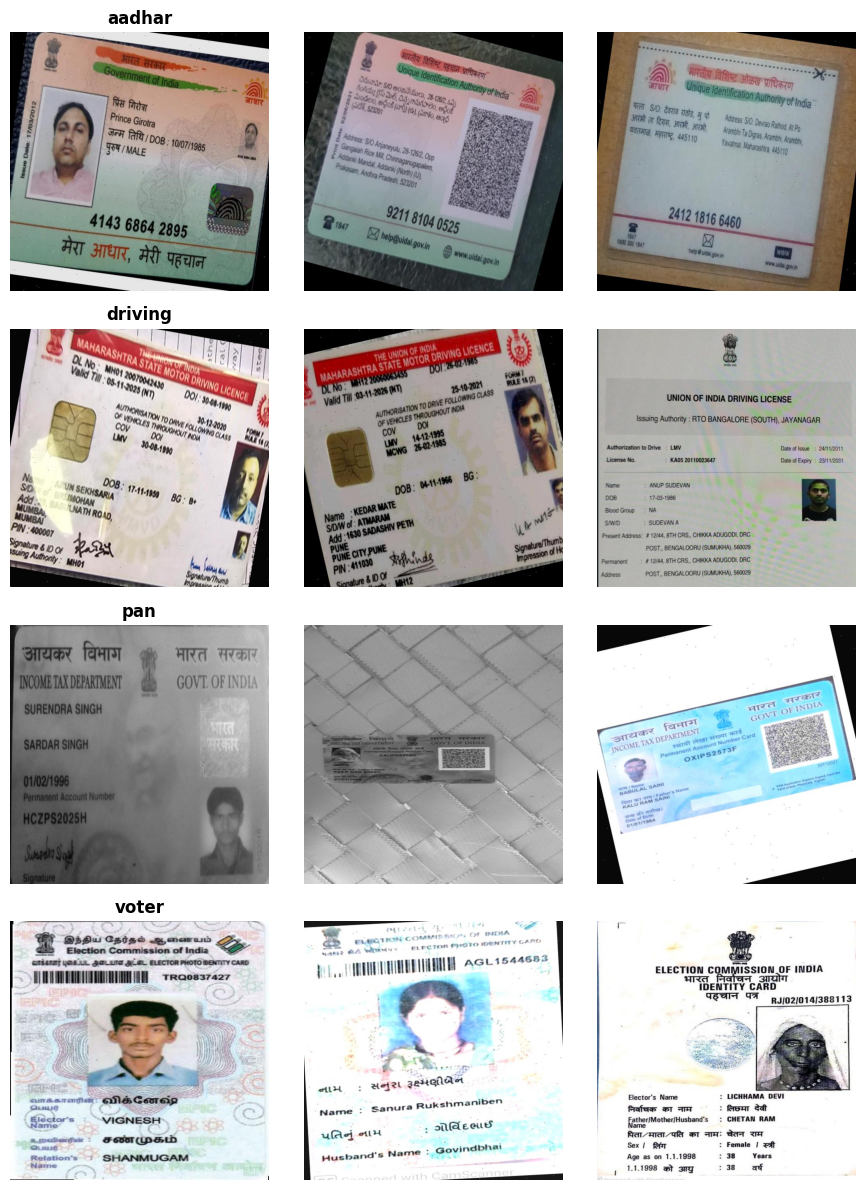

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def display_sample_images(base_dir, split='train', num_samples=5):
    """Display sample images from each class"""
    split_dir = os.path.join(base_dir, split)
    if not os.path.exists(split_dir):
        print(f"Split '{split}' not found.")
        return
    
    classes = [d for d in os.listdir(split_dir) 
               if os.path.isdir(os.path.join(split_dir, d))]
    
    num_classes = len(classes)
    fig, axes = plt.subplots(num_classes, num_samples, 
                            figsize=(num_samples * 3, num_classes * 3))
    
    if num_classes == 1:
        axes = [axes]
    
    for i, class_name in enumerate(sorted(classes)):
        class_dir = os.path.join(split_dir, class_name)
        image_files = [f for f in os.listdir(class_dir) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Select random samples
        samples = random.sample(image_files, min(num_samples, len(image_files)))
        
        for j, img_file in enumerate(samples):
            img_path = os.path.join(class_dir, img_file)
            img = Image.open(img_path)
            
            ax = axes[i][j] if num_classes > 1 else axes[j]
            ax.imshow(img)
            ax.axis('off')
            
            if j == 0:
                ax.set_title(f'{class_name}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Display sample images from training set
print("🖼️  Sample Images from Training Set:")
display_sample_images(OUTPUT_DIR, split='train', num_samples=3)

## Step 8: (Optional) Organize Dataset for Custom Structure

If you need a different folder structure, you can reorganize the dataset.

In [8]:
def organize_dataset(source_dir, target_dir="organized_dataset"):
    """Organize dataset into a custom structure"""
    print(f"\n🗂️  Organizing dataset into: {target_dir}")
    
    os.makedirs(target_dir, exist_ok=True)
    
    # Class mapping - use exact names from Roboflow dataset
    class_mapping = {
        'aadhar': 'aadhar',
        'aadhaar': 'aadhar',
        'pan': 'pan',
        'voter': 'voter',
        'voterid': 'voter',
        'driving': 'driving',
        'dl': 'driving',
        'passport': 'passport'
    }
    
    # Create class directories - using exact Roboflow class names
    classes = ['aadhar', 'driving', 'pan', 'voter', "passport"]
    for cls in classes:
        os.makedirs(os.path.join(target_dir, cls), exist_ok=True)
    
    # Copy and organize files
    stats = {cls: 0 for cls in classes}
    
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_lower = file.lower()
                
                # Determine class from filename or directory
                matched_class = None
                for key, cls in class_mapping.items():
                    if key in file_lower or key in root.lower():
                        matched_class = cls
                        break
                
                if matched_class and matched_class in classes:
                    src_path = os.path.join(root, file)
                    dst_path = os.path.join(target_dir, matched_class, file)
                    shutil.copy2(src_path, dst_path)
                    stats[matched_class] += 1
    
    print("\n✅ Dataset organized!")
    print("\nClass distribution:")
    total = 0
    for cls, count in stats.items():
        print(f"  - {cls}: {count} images")
        total += count
    print(f"  Total: {total} images")
    
    return target_dir

# Uncomment to organize dataset
# organized_dir = organize_dataset(OUTPUT_DIR, "organized_dataset")

## Summary

✅ Dataset downloaded successfully!  
✅ Dataset structure explored  
✅ Image counts verified  
✅ Sample images displayed  

**Dataset Classes:** `aadhar`, `driving`, `pan`, `voter`

**Next Steps:**
1. Use this dataset to train your KYC/AML document classifier
2. Run: `python training/train_classifier.py --data dataset/train --epochs 20`

**Dataset Location:** `dataset/`
**Structure:**
```
dataset/
├── train/
│   ├── aadhar/
│   ├── driving/
│   ├── pan/
│   └── voter/
└── valid/
    ├── aadhar/
    ├── driving/
    ├── pan/
    └── voter/
```